In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("Credit Card Defaulter Prediction.csv")

In [3]:
print(data.shape)
print(data.columns.values)
print(data.isnull().sum())
print(data.head())
print(data.dtypes)

(30000, 25)
['ID' 'LIMIT_BAL' 'SEX' 'EDUCATION' 'MARRIAGE' 'AGE' 'PAY_0' 'PAY_2'
 'PAY_3' 'PAY_4' 'PAY_5' 'PAY_6' 'BILL_AMT1' 'BILL_AMT2' 'BILL_AMT3'
 'BILL_AMT4' 'BILL_AMT5' 'BILL_AMT6' 'PAY_AMT1' 'PAY_AMT2' 'PAY_AMT3'
 'PAY_AMT4' 'PAY_AMT5' 'PAY_AMT6' 'Default']
ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64
   ID  LIMIT_BAL SEX   EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000   F  University  Married   24      2      2     -1     -1   
1   2     120000   F  University   Single   26     -1      2      0      0   
2   3      90000   F  University   Single   34      0      0      0      0   
3   4      50000   F  University  M

In [4]:
print(data["SEX"].value_counts())
print("_"*100)
print(data["EDUCATION"].value_counts())
print("_"*100)
print(data["MARRIAGE"].value_counts())

F    18112
M    11888
Name: SEX, dtype: int64
____________________________________________________________________________________________________
University         14030
Graduate school    10585
High School         4917
Unknown              331
Others               123
0                     14
Name: EDUCATION, dtype: int64
____________________________________________________________________________________________________
Single     15964
Married    13659
Other        323
0             54
Name: MARRIAGE, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


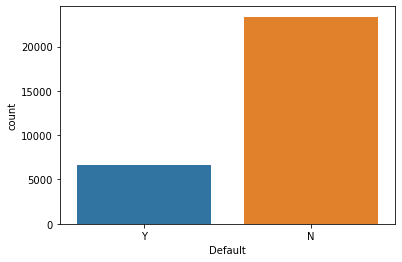

In [5]:
sns.countplot(data["Default"])
plt.show()

In [6]:
La = LabelEncoder()

data["SEX"] = La.fit_transform(data["SEX"])
data["EDUCATION"] = La.fit_transform(data["EDUCATION"])
data["MARRIAGE"] = La.fit_transform(data["MARRIAGE"])

In [7]:
data["Default"] = data["Default"].map({"N":0,"Y":1})

In [8]:
print(data.dtypes)

ID           int64
LIMIT_BAL    int64
SEX          int32
EDUCATION    int32
MARRIAGE     int32
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
Default      int64
dtype: object


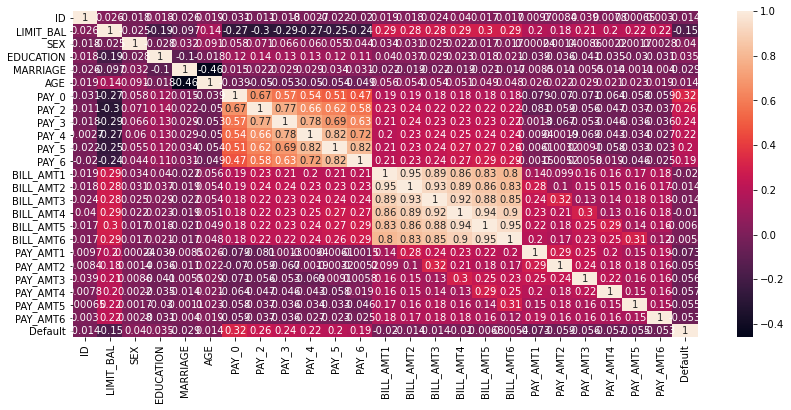

In [9]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [10]:
x = data.drop("Default",axis=1)
y = data["Default"]

ss = StandardScaler()
x = ss.fit_transform(x)
print(x[:5])

[[-1.73199307 -1.13672015 -0.81016074  0.99016463 -1.07903787 -1.24601985
   1.79456386  1.78234817 -0.69666346 -0.66659873 -1.53004603 -1.48604076
  -0.64250107 -0.64739923 -0.66799331 -0.67249727 -0.66305853 -0.65272422
  -0.34194162 -0.22708564 -0.29680127 -0.30806256 -0.31413612 -0.29338206]
 [-1.7318776  -0.3659805  -0.81016074  0.99016463  0.93177904 -1.02904717
  -0.87499115  1.78234817  0.1388648   0.18874609  0.23491652  1.99231551
  -0.65921875 -0.66674657 -0.63925429 -0.62163594 -0.60622927 -0.59796638
  -0.34194162 -0.21358766 -0.24000461 -0.24422965 -0.31413612 -0.18087821]
 [-1.73176213 -0.59720239 -0.81016074  0.99016463  0.93177904 -0.16115646
   0.01486052  0.1117361   0.1388648   0.18874609  0.23491652  0.25313738
  -0.29855966 -0.49389911 -0.48240819 -0.44973025 -0.41718767 -0.39162956
  -0.25029158 -0.19188673 -0.24000461 -0.24422965 -0.24868274 -0.01212243]
 [-1.73164666 -0.90549825 -0.81016074  0.99016463 -1.07903787  0.16430256
   0.01486052  0.1117361   0.138864

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=44, shuffle =True)

In [12]:
Lo = LogisticRegression()
Lo.fit(X_train, y_train)

print("_"*100)
print(Lo.score(X_train, y_train))
print(Lo.score(X_test, y_test))
print("_"*100)

____________________________________________________________________________________________________
0.808952380952381
0.8118888888888889
____________________________________________________________________________________________________


In [15]:
print("_"*150)
for x in range(2,20):
    Dt = DecisionTreeClassifier(max_depth=x,random_state=33)
    Dt.fit(X_train, y_train)

    print("x = ", x)
    print(Dt.score(X_train, y_train))
    print(Dt.score(X_test, y_test))
    print("_"*100)

______________________________________________________________________________________________________________________________________________________
x =  2
0.8194285714285714
0.8217777777777778
____________________________________________________________________________________________________
x =  3
0.8217142857142857
0.8226666666666667
____________________________________________________________________________________________________
x =  4
0.8225238095238095
0.8222222222222222
____________________________________________________________________________________________________
x =  5
0.8237619047619048
0.82
____________________________________________________________________________________________________
x =  6
0.8255714285714286
0.8182222222222222
____________________________________________________________________________________________________
x =  7
0.8300952380952381
0.8176666666666667
________________________________________________________________________________________

In [17]:
MLC = MLPClassifier(activation='tanh',
                                 solver='lbfgs', 
                                 learning_rate='constant',
                                 alpha=0.00001 ,hidden_layer_sizes=(200, 3),random_state=33)


MLC.fit(X_train, y_train)

print("_"*100)
print(MLC.score(X_train, y_train))
print(MLC.score(X_test, y_test))

____________________________________________________________________________________________________
0.8518571428571429
0.7996666666666666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [18]:
# for x in range(2,30):
#     KNN = KNeighborsClassifier(n_neighbors=x)

#     print(": " ,x)
#     KNN.fit(X_train, y_train)
#     print(KNN.score(X_train, y_train))
#     print(KNN.score(X_test, y_test))


In [19]:
Dt = DecisionTreeClassifier(max_depth=3,random_state=33)
Dt.fit(X_train, y_train)

print("_"*100)
print(Dt.score(X_train, y_train))
print(Dt.score(X_test, y_test))
print("_"*100)

____________________________________________________________________________________________________
0.8217142857142857
0.8226666666666667
____________________________________________________________________________________________________


In [20]:
y_pred = Dt.predict(X_test)

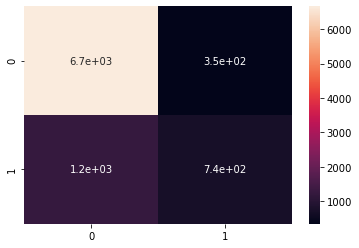

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [22]:
autput = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
# autput.to_csv("autput.csv",index=False)